In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv(r"E:/New folder/Data-Analysis-Projects/EDA Task.csv")

# Check structure
df.info()

# Count missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Sex                  891 non-null    object 
 4   Age                  714 non-null    float64
 5   Sibilings or spouse  891 non-null    int64  
 6   Parents or Children  891 non-null    int64  
 7   Fare                 891 non-null    float64
 8   Embarked             889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


PassengerId              0
Survived                 0
Pclass                   0
Sex                      0
Age                    177
Sibilings or spouse      0
Parents or Children      0
Fare                     0
Embarked                 2
dtype: int64

In [16]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop all rows with ANY missing values
df_cleaned = df.dropna()

# Verify no missing values remain
print(df_cleaned.isnull().sum())

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
Sibilings or spouse    0
Parents or Children    0
Fare                   0
Embarked               0
dtype: int64


In [17]:
# Mapping dictionary: code → country
embarked_map = {
    'C': 'France',
    'Q': 'Ireland',
    'S': 'England'
}

# Replace codes with country names
df['Embarked'] = df['Embarked'].map(embarked_map)

# Check the result
print(df[['PassengerId', 'Embarked']].head(10)) 

   PassengerId Embarked
0            1  England
1            2   France
2            3  England
3            4  England
4            5  England
5            6  Ireland
6            7  England
7            8  England
8            9  England
9           10   France


In [18]:
# Convert to appropriate types
df['Pclass']   = df['Pclass'].astype('category')   # Passenger class as category
df['Embarked'] = df['Embarked'].astype('category')
df['Sex'] = df['Sex'].astype('category')

# Summary of numeric & categorical
print(df.describe())

# Check results
print(df.dtypes)

       PassengerId    Survived         Age  Sibilings or spouse  \
count   891.000000  891.000000  891.000000           891.000000   
mean    446.000000    0.383838   29.361582             0.523008   
std     257.353842    0.486592   13.019697             1.102743   
min       1.000000    0.000000    0.420000             0.000000   
25%     223.500000    0.000000   22.000000             0.000000   
50%     446.000000    0.000000   28.000000             0.000000   
75%     668.500000    1.000000   35.000000             1.000000   
max     891.000000    1.000000   80.000000             8.000000   

       Parents or Children        Fare  
count           891.000000  891.000000  
mean              0.381594   32.205017  
std               0.806057   49.693389  
min               0.000000    0.000000  
25%               0.000000    7.915000  
50%               0.000000   14.450000  
75%               0.000000   31.000000  
max               6.000000  512.330000  
PassengerId               i

In [19]:
print("Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6068\1912841337.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean())


In [20]:
print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())


Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6068\2864699517.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())


In [21]:
print("\nSurvival Rate by Gender & Pclass:")
print(df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean'))


Survival Rate by Gender & Pclass:


C:\Users\User\AppData\Local\Temp\ipykernel_6068\995333686.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean'))


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [22]:
bins = [0, 1, 12, 18, 35, 60, 100]
labels = ['Infant', 'Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, include_lowest=True)

print("\nSurvival Rate by Age Group:")
print(df_cleaned.groupby('AgeGroup')['Survived'].mean())


Survival Rate by Age Group:
AgeGroup
Infant         0.857143
Child          0.509091
Teen           0.428571
Adult          0.353271
Middle-aged    0.396907
Senior         0.190476
Name: Survived, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6068\783851698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, include_lowest=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6068\783851698.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_cleaned.groupby('AgeGroup')['Survived'].mean())


In [23]:
# Save new CSV
df.to_csv("titanic_cleaned.csv", index=False)

print("✅ File saved as titanic_cleaned.csv")

✅ File saved as titanic_cleaned.csv


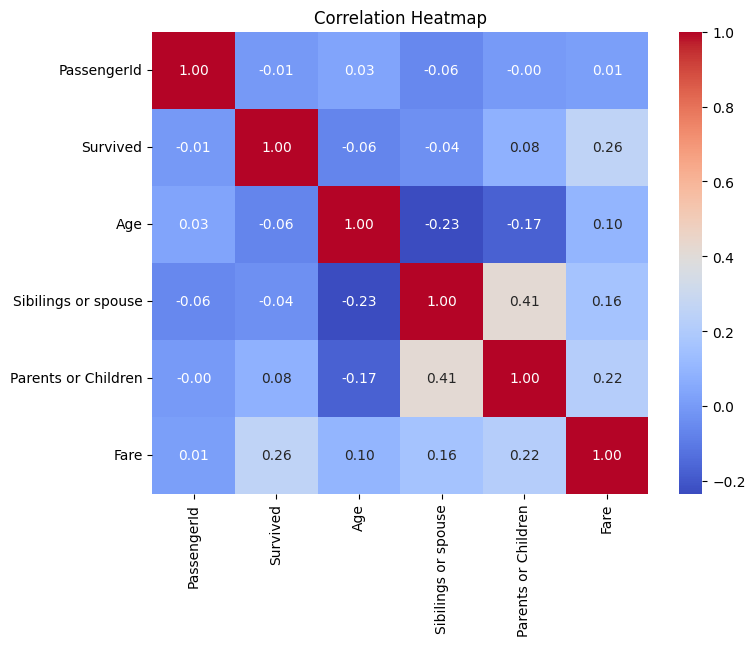

In [24]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6068\2158876282.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, ci=None, palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_6068\2158876282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, ci=None, palette="Set2")


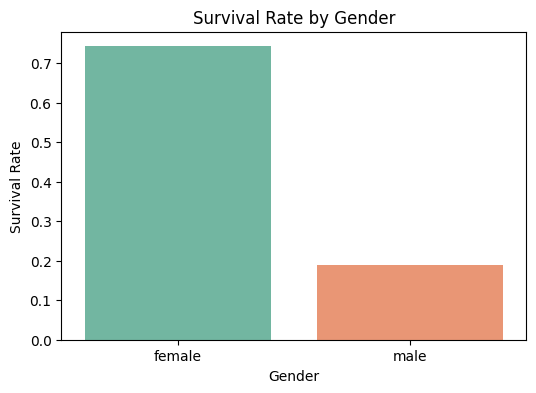

In [25]:
# Survival Rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df, ci=None, palette="Set2")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6068\2117374069.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="Set3")
C:\Users\User\AppData\Local\Temp\ipykernel_6068\2117374069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="Set3")


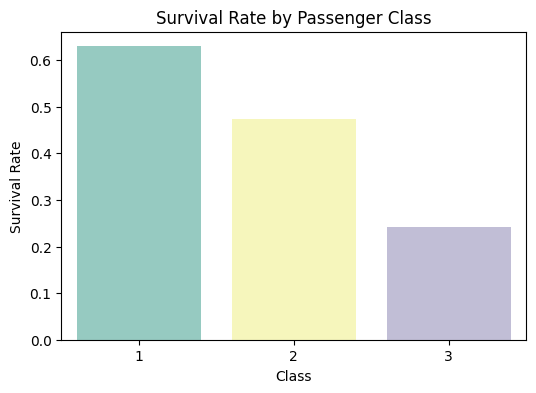

In [26]:
# Survival Rate by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="Set3")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Class")
plt.show()